In [1]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import import_ipynb
from model import Model, fast_optimize, fast_simulate

importing Jupyter notebook from model.ipynb
The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


In [2]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


# Parameter recovery

In [3]:
# Seed the pseudo-random number generator
np.random.seed(1284)

# Select one model
model = Model 

# Define the number of agents to simulate
n = 30 

for n_trial in 100, 500, 1000, 10000: 

    # Data container
    row_list = []

    # For each agent...
    for i in tqdm(range(n), file=sys.stdout):

        # Generate parameters to simualte
        param_to_sim = [np.random.uniform(*b) for b in model.fit_bounds]

        # Simulate
        d = fast_simulate(model=model, param=param_to_sim, n_trial=n_trial)

        # Optimize
        best_param, best_value = fast_optimize(model=model, data=d)

        # Backup
        for j in range(len(param_to_sim)):
            row_list.append({
                "Parameter": model.param_labels[j],
                "Used to simulate": param_to_sim[j],
                "Recovered": best_param[j]})

    # Create dataframe and save it
    df = pd.DataFrame(row_list)
    df.to_csv(os.path.join(BACKUP_FOLDER, f"parameter_recovery_{n_trial}.csv"))

100%|██████████| 30/30 [00:13<00:00,  2.17it/s]


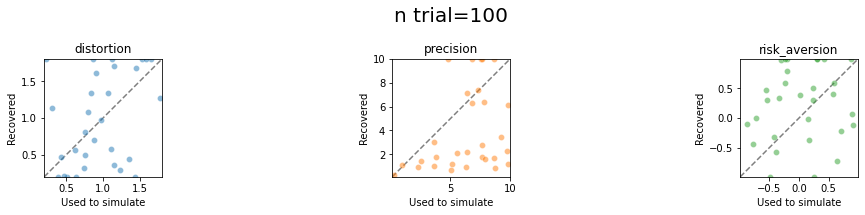

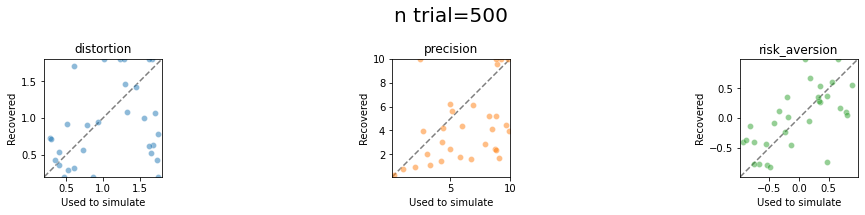

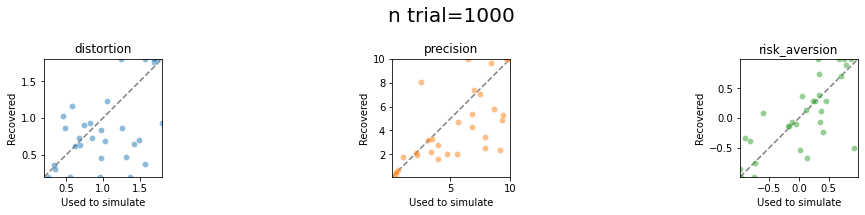

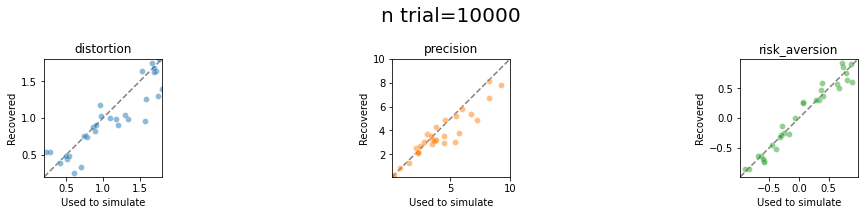

In [6]:
# Plot
param_names = Model.param_labels
param_bounds = Model.fit_bounds
n_param = len(param_names)

# Define colors
colors = [f'C{i}' for i in range(n_param)]

for n_trial in 100, 500, 1000, 10000:  
    
    # Load data
    df = pd.read_csv(os.path.join(BACKUP_FOLDER, f"parameter_recovery_{n_trial}.csv"), index_col=0)
    
    # Create fig and axes
    fig, axes = plt.subplots(ncols=n_param,
                             figsize=(5*n_param, 3))

    fig.suptitle(f"n trial={n_trial}", fontsize=20)
    
    for i in range(n_param):

        # Select ax
        ax = axes[i]

        # Get param name
        p_name = param_names[i]

        # Set title
        ax.set_title(p_name)

        # Create scatter
        sns.scatterplot(data=df[df["Parameter"] == p_name], 
                        x="Used to simulate", y="Recovered", 
                        alpha=0.5, color=colors[i], 
                        ax=ax)

        # Plot identity function
        ax.plot(param_bounds[i], param_bounds[i], 
                linestyle="--", alpha=0.5, color="black", zorder=-10)

        # Set axes limits
        ax.set_xlim(*param_bounds[i])
        ax.set_ylim(*param_bounds[i])

        # Square aspect
        ax.set_aspect(1)

    plt.tight_layout()
    plt.show()